<a href="https://colab.research.google.com/github/tarasov001/ml/blob/main/Employee_promotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%autosave 10

Autosaving every 10 seconds


# 0. Описание задачи

У крупных организаций существует проблема - определения людей для продвижения и своевременная подготовка к новым должностям.

Окончательные предложения делаются сотрдникам только после долгой оценки его работы, что приводит к задержке перехода к новым должностям. Следовательно, компании нужна помощь в определении подходящих кандидатов на повышение, чтобы они могли ускорить весь цикл продвижения.

# 1. Загрузка данных

In [124]:
data = pd.read_csv("data.csv")

data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,0.0,49.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30.0,5.0,4.0,0.0,60.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34.0,3.0,7.0,0.0,50.0,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39.0,1.0,10.0,0.0,50.0,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1.0,45.0,3.0,2.0,0.0,73.0,0.0


In [125]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

employee_id: Уникальный ID номер сотрудника\
department: Отдел\
region: Регион\
education: Образование\
gender: Пол\
recruitment_channel: Канал найма\
no_ of_ trainings: Количество пройденных сотрудником тренингов в прошлом году\
age: Возраст\
previous_ year_ rating: Рейтинг сотрудника в прошлом году\
Стаж: Length of service in years\
awards_ won: Есть ли награды в прошлом году (1 - да, 0 - нет)\
avg_ training_ score: Средний балл по обучающим курсам\
is_promoted: Рекомендован к повышению или нет

In [126]:
data = data.rename(columns={'awards_won?' : 'awards_won'})

Удалим ненужный стобец данных с id номером каждого сотрудника

In [127]:
data = data.drop(labels='employee_id', axis=1)
data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,0.0,49.0,0.0
1,Operations,region_22,Bachelor's,m,other,1.0,30.0,5.0,4.0,0.0,60.0,0.0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34.0,3.0,7.0,0.0,50.0,0.0
3,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39.0,1.0,10.0,0.0,50.0,0.0
4,Technology,region_26,Bachelor's,m,other,1.0,45.0,3.0,2.0,0.0,73.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15551,Technology,region_2,Master's & above,f,other,1.0,37.0,3.0,10.0,0.0,89.0,1.0
15552,Technology,region_8,Master's & above,m,other,1.0,35.0,1.0,3.0,0.0,80.0,0.0
15553,Technology,region_31,Bachelor's,f,sourcing,3.0,26.0,2.0,2.0,0.0,81.0,0.0
15554,Sales & Marketing,region_22,Master's & above,m,other,1.0,35.0,1.0,10.0,0.0,44.0,0.0


In [128]:
data.corr()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.078398,-0.071123,-0.050267,-0.013427,0.050112,-0.033281
age,-0.078398,1.000000,0.008664,0.656706,0.001550,-0.051101,-0.011753
previous_year_rating,-0.071123,0.008664,1.000000,0.003314,0.018624,0.074875,0.160844
length_of_service,-0.050267,0.656706,0.003314,1.000000,-0.036282,-0.030025,0.001070
awards_won,-0.013427,0.001550,0.018624,-0.036282,1.000000,0.058981,0.183036
avg_training_score,0.050112,-0.051101,0.074875,-0.030025,0.058981,1.000000,0.180410
is_promoted,-0.033281,-0.011753,0.160844,0.001070,0.183036,0.180410,1.000000


# 2. Описательная статистика

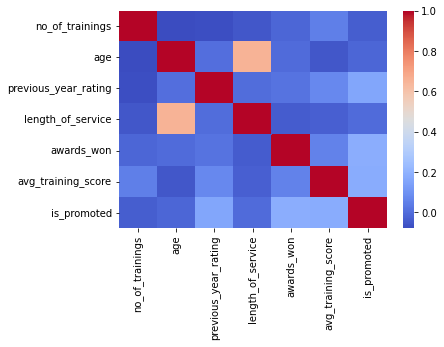

In [129]:
sns.heatmap(data.corr(), cmap='coolwarm')

# 3. Поиск и обработка пропущенных значений

Посмотрим сколько пропцщенных значений в каждом столбце

In [130]:
data.isna().sum()

department                 0
region                     1
education                717
gender                     1
recruitment_channel        1
no_of_trainings            1
age                        1
previous_year_rating    1176
length_of_service          1
awards_won                 1
avg_training_score         1
is_promoted                1
dtype: int64

In [131]:
data.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [132]:
data.previous_year_rating.unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

В столбце education вероятнее всего пропущенные значения означают отсутствие образования совсем\
Также можно сделать предположение, что работники, у которых в столбце previous_year_rating пустое значение, работают первый год

Заполним пустые значения в столбцах:

In [133]:
data.education = data.education.fillna('Without education')

In [134]:
data.education.unique()

array(["Master's & above", "Bachelor's", 'Without education',
       'Below Secondary'], dtype=object)

In [135]:
data.previous_year_rating = data.previous_year_rating.fillna(0.0)

In [136]:
data.previous_year_rating.unique()

array([5., 3., 1., 4., 0., 2.])

Строки с пропущенными значениями последних 4 признаков можно удалить, так как к значимой потере данных это никак не приведет

In [137]:
data = data.dropna()

# 4. Обработка категориальных признаков

In [138]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [139]:
from sklearn.preprocessing import OrdinalEncoder

In [140]:
ordinal_encoder = OrdinalEncoder()

In [141]:
data[object_cols] = ordinal_encoder.fit_transform(data[object_cols])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [142]:
ordinal_encoder.categories_

[array(['Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
        'R&D', 'Sales & Marketing', 'Technology'], dtype=object),
 array(['region_1', 'region_10', 'region_11', 'region_12', 'region_13',
        'region_14', 'region_15', 'region_16', 'region_17', 'region_18',
        'region_19', 'region_2', 'region_20', 'region_21', 'region_22',
        'region_23', 'region_24', 'region_25', 'region_26', 'region_27',
        'region_28', 'region_29', 'region_3', 'region_30', 'region_31',
        'region_32', 'region_33', 'region_34', 'region_4', 'region_5',
        'region_6', 'region_7', 'region_8', 'region_9'], dtype=object),
 array(["Bachelor's", 'Below Secondary', "Master's & above",
        'Without education'], dtype=object),
 array(['f', 'm'], dtype=object),
 array(['other', 'referred', 'sourcing'], dtype=object)]

In [143]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7.0,31.0,2.0,0.0,2.0,1.0,35.0,5.0,8.0,0.0,49.0,0.0
1,4.0,14.0,0.0,1.0,0.0,1.0,30.0,5.0,4.0,0.0,60.0,0.0
2,7.0,10.0,0.0,1.0,2.0,1.0,34.0,3.0,7.0,0.0,50.0,0.0
3,7.0,15.0,0.0,1.0,0.0,2.0,39.0,1.0,10.0,0.0,50.0,0.0
4,8.0,18.0,0.0,1.0,0.0,1.0,45.0,3.0,2.0,0.0,73.0,0.0


# 5. Нормализация данных

In [144]:
data.mean(axis=0), data.std(axis=0)

(department               4.969785
 region                  15.510254
 education                0.699261
 gender                   0.705754
 recruitment_channel      0.866988
 no_of_trainings          1.251430
 age                     34.789200
 previous_year_rating     3.089553
 length_of_service        5.858438
 awards_won               0.022694
 avg_training_score      63.441144
 is_promoted              0.085760
 dtype: float64, department               2.515987
 region                   8.783888
 education                1.016678
 gender                   0.455718
 recruitment_channel      0.980778
 no_of_trainings          0.603004
 age                      7.634322
 previous_year_rating     1.496562
 length_of_service        4.259883
 awards_won               0.148930
 avg_training_score      13.418212
 is_promoted              0.280019
 dtype: float64)

In [145]:
data_norm = (data - data.mean(axis=0)) / data.std(axis=0)
data_norm.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,1.555500e+04,1.555500e+04,1.555500e+04,1.555500e+04,1.555500e+04,1.555500e+04,1.555500e+04,1.555500e+04,1.555500e+04,1.555500e+04,1.555500e+04,1.555500e+04
mean,5.275255e-17,-2.258435e-16,6.612518e-16,-3.419815e-16,-1.837881e-17,1.155902e-16,2.409108e-16,3.293198e-17,8.099525e-17,3.367427e-17,-1.747236e-16,-1.061039e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.975282e+00,-1.765762e+00,-6.877898e-01,-1.548664e+00,-8.839797e-01,-4.169629e-01,-1.937199e+00,-2.064434e+00,-1.140510e+00,-1.523783e-01,-1.821490e+00,-3.062661e-01
25%,-3.854490e-01,-5.134690e-01,-6.877898e-01,-1.548664e+00,-8.839797e-01,-4.169629e-01,-7.583122e-01,-7.280375e-01,-6.710132e-01,-1.523783e-01,-9.271835e-01,-3.062661e-01
50%,1.200935e-02,-1.719346e-01,-6.877898e-01,6.456764e-01,-8.839797e-01,-4.169629e-01,-2.343626e-01,-5.983929e-02,-2.015168e-01,-1.523783e-01,-2.564533e-01,-3.062661e-01
75%,8.069260e-01,7.388239e-01,1.279402e+00,6.456764e-01,1.155217e+00,-4.169629e-01,5.515618e-01,6.083590e-01,2.679797e-01,-1.523783e-01,9.359560e-01,-3.062661e-01
max,1.204384e+00,1.991117e+00,2.262997e+00,6.456764e-01,1.155217e+00,1.450830e+01,3.302297e+00,1.276557e+00,6.606182e+00,6.562194e+00,2.650044e+00,3.264925e+00


# 6. Отбор признаков

In [146]:
X = data_norm.drop(['is_promoted'], axis=1)

In [147]:
y = data.is_promoted

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

# 7. Обучение модели

In [150]:
from sklearn.neighbors import KNeighborsClassifier

In [151]:
model_k5 = KNeighborsClassifier(n_neighbors=5)
model_k5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [152]:
y_train_predict = model_k5.predict(X_train)
y_test_predict = model_k5.predict(X_test)

# 8. Метрика качества

In [153]:
from sklearn.metrics import mean_squared_error

In [154]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test = mean_squared_error(y_test, y_test_predict)
MSE_train, MSE_test

(0.07503673769287289, 0.08699378615813157)